# **-04a-Object-detection-in-image-processing  © by A.Richter**

<img src=88x31.png  width="10%"> 

**Preface**: 

## Overview of the notebook: 

   1. [Straight line Hough transform](#line)
   2. [Circular and Elliptical Hough Transforms](#circ)
   
   
 

## Straight line Hough transform <a name="line" ></a>

Lines in a mathematical 2D coordinate system can be constructed in differend ways. The easiest an well known way is the form $y(x)=b_0 + b_1 \cdot x $ where $b_0$ ist the y-intersection and $b_1$ is the gradient of the line. Here in this example $b_0=3$ and $b_1 = -\frac{1}{2}$

<img src="figures/Line-1.png">

In 2D vector analysis also the point-direction form is used $\vec x = \vec p + s \cdot \vec u$ where $\vec p$ is the support vector jumping on an arbitrary point on the line, $\vec u $ defines the direction and $s \in \mathbb{R}$ is a parameter to be multiplied with $\vec u$. Here $\vec p= \begin{pmatrix}2\\2\end{pmatrix}$ and $ \vec u = \begin{pmatrix}2\\-1\end{pmatrix}$




<img src="figures/Line-2.png">

A special case of the point-direction form is the so called Hesse-Normal form with $\vec n \cdot \vec x = d$. The vector $\vec n $ is orthogonal on the line and has the norm = 1 while d is the distance of the line from the origine.

<img src="figures/Line-3.png">


<p>The Hough transform in its simplest form is a <a class="reference external" href="http://en.wikipedia.org/wiki/Hough_transform">method to detect straight lines</a>.</p>
<p>In the following example, we construct an image with a line intersection. We
then use the Hough transform to explore a parameter space for straight lines
that may run through the image.</p>
<div class="section" id="algorithm-overview">
<h1>Algorithm overview</h1>
<p>Usually, lines are parameterised as $y = mx + c$, with a gradient
$m$ and y-intercept <cite>c</cite>. However, this would mean that $m$ goes to
infinity for vertical lines. Instead, we therefore construct a segment
perpendicular to the line, leading to the origin. The line is represented by
the length of that segment, $r$, and the angle it makes with the x-axis,
$theta$.</p>
<p>The Hough transform constructs a histogram array representing the parameter
space (i.e., an $M times N$ matrix, for $M$ different values of
the radius and $N$ different values of $theta$).  For each
parameter combination, $r$ and $theta$, we then find the number of
non-zero pixels in the input image that would fall close to the corresponding
line, and increment the array at position $(r, theta)$ appropriately.</p>
<p>We can think of each non-zero pixel &quot;voting&quot; for potential line candidates. The
local maxima in the resulting histogram indicates the parameters of the most
probably lines. In our example, the maxima occur at 45 and 135 degrees,
corresponding to the normal vector angles of each line.</p>
<p>Another approach is the Progressive Probabilistic Hough Transform [1]. It is
based on the assumption that using a random subset of voting points give a good
approximation to the actual result, and that lines can be extracted during the
voting process by walking along connected components. This returns the
beginning and end of each line segment, which is useful.</p>
<p>The function <cite>probabilistic_hough</cite> has three parameters: a general threshold
that is applied to the Hough accumulator, a minimum line length and the line
gap that influences line merging. In the example below, we find lines longer
than 10 with a gap less than 3 pixels.</p>
</div>
<div class="section" id="references">
<h1>References</h1>
<table class="docutils footnote" frame="void" id="id1" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label">[1]</td><td>C. Galamhos, J. Matas and J. Kittler,&quot;Progressive probabilistic
Hough transform for line detection&quot;, in IEEE Computer Society
Conference on Computer Vision and Pattern Recognition, 1999.</td></tr>
</tbody>
</table>
<table class="docutils footnote" frame="void" id="id2" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label">[2]</td><td>Duda, R. O. and P. E. Hart, &quot;Use of the Hough Transformation to
Detect Lines and Curves in Pictures,&quot; Comm. ACM, Vol. 15,
pp. 11-15 (January, 1972)</td></tr>
</tbody>
</table>
</div>
</div>


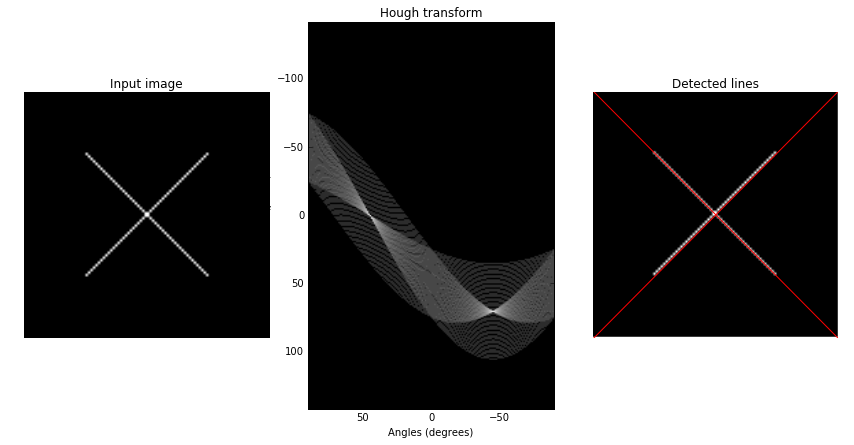

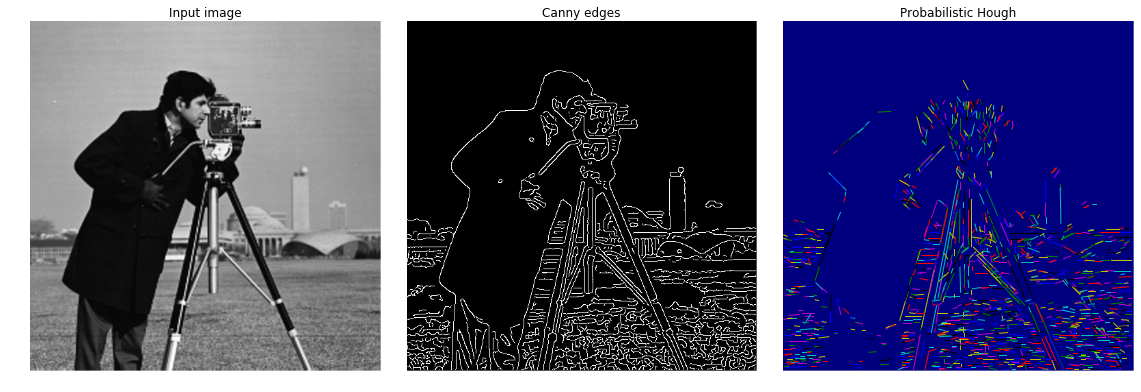

In [1]:

from matplotlib import cm
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Constructing test image.
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform.
h, theta, d = hough_line(image)

# Generating figure 1.
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))
plt.tight_layout()

ax0.imshow(image, cmap=cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()

ax1.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
           d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
ax1.set_title('Hough transform')
ax1.set_xlabel('Angles (degrees)')
ax1.set_ylabel('Distance (pixels)')
ax1.axis('image')

ax2.imshow(image, cmap=cm.gray)
row1, col1 = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    ax2.plot((0, col1), (y0, y1), '-r')
ax2.axis((0, col1, row1, 0))
ax2.set_title('Detected lines')
ax2.set_axis_off()

# Line finding using the Probabilistic Hough Transform.
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)





# Generating figure 2.
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6), sharex=True,
                                    sharey=True)
plt.tight_layout()

ax0.imshow(image, cmap=cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()
ax0.set_adjustable('box-forced')

ax1.imshow(edges, cmap=cm.gray)
ax1.set_title('Canny edges')
ax1.set_axis_off()
ax1.set_adjustable('box-forced')

ax2.imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax2.plot((p0[0], p1[0]), (p0[1], p1[1]))

row2, col2 = image.shape
ax2.axis((0, col2, row2, 0))

ax2.set_title('Probabilistic Hough')
ax2.set_axis_off()
ax2.set_adjustable('box-forced')

plt.show()


## Circular and Elliptical Hough Transforms <a name="circ" ></a>





<p>The Hough transform in its simplest form is a <a class="reference external" href="http://en.wikipedia.org/wiki/Hough_transform">method to detect
straight lines</a>
but it can also be used to detect circles or ellipses.
The algorithm assumes that the edge is detected and it is robust against
noise or missing points.</p>
<div class="section" id="circle-detection">
<h1>Circle detection</h1>
<p>In the following example, the Hough transform is used to detect
coin positions and match their edges. We provide a range of
plausible radii. For each radius, two circles are extracted and
we finally keep the five most prominent candidates.
The result shows that coin positions are well-detected.</p>
<div class="section" id="algorithm-overview">
<h2>Algorithm overview</h2>
<p>Given a black circle on a white background, we first guess its
radius (or a range of radii) to construct a new circle.
This circle is applied on each black pixel of the original picture
and the coordinates of this circle are voting in an accumulator.
From this geometrical construction, the original circle center
position receives the highest score.</p>
<p>Note that the accumulator size is built to be larger than the
original picture in order to detect centers outside the frame.
Its size is extended by two times the larger radius.</p>
</div>
</div>
</div>


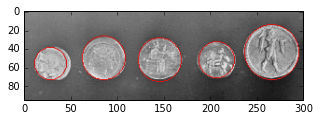

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[0:95, 70:370])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

fig = plt.figure(figsize=(20,10))  
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 2))

# Detect two radii
hough_radii = np.arange(15, 30, 2)
hough_res = hough_circle(edges, hough_radii)

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    num_peaks = 2
    peaks = peak_local_max(h, num_peaks=num_peaks)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)

# Draw the most prominent 5 circles
 
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:5]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    image[cy, cx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)




<div class="document" id="ellipse-detection">
<h1 class="title">Ellipse detection</h1>
<p>In this second example, the aim is to detect the edge of a coffee cup.
Basically, this is a projection of a circle, i.e. an ellipse.
The problem to solve is much more difficult because five parameters have to be
determined, instead of three for circles.</p>
<div class="section" id="algorithm-overview">
<h1>Algorithm overview</h1>
<p>The algorithm takes two different points belonging to the ellipse. It assumes
that it is the main axis. A loop on all the other points determines how much
an ellipse passes to them. A good match corresponds to high accumulator values.</p>
<p>A full description of the algorithm can be found in reference [1].</p>
</div>
<div class="section" id="references">
<h1>References</h1>
<table class="docutils footnote" frame="void" id="id1" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label">[1]</td><td>Xie, Yonghong, and Qiang Ji. &quot;A new efficient ellipse detection
method.&quot; Pattern Recognition, 2002. Proceedings. 16th International
Conference on. Vol. 2. IEEE, 2002</td></tr>
</tbody>
</table>
</div>
</div>


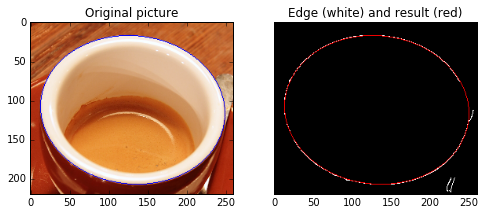

In [2]:

import matplotlib.pyplot as plt

from skimage import data, color
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(edges)
edges[cy, cx] = (250, 0, 0)
figsiz
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), sharex=True,
                                sharey=True,
                                subplot_kw={'adjustable':'box-forced'})

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()



<div class="document">
</div>
